# Feature Lab
## Edge, HOG and L2 Matching

In this practice we will have three tasks: 
* Detect edge from images
* Compute HOG descriptor for tiny images
* Matching tiny images using L2 distance with pixels, edges and HOG descriptors

Let's start!

# Warm up

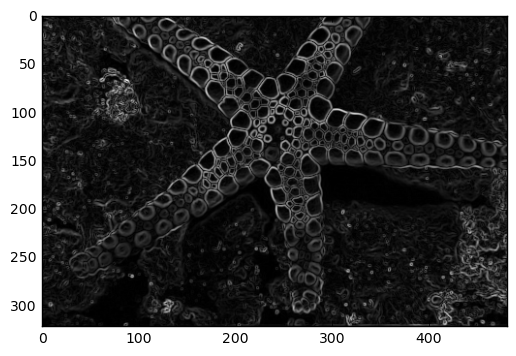

In [12]:
# Let's start from some basics
# In this section, we will read in an image, and detect its edge map using the built-in sobel edge detection from skimage library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.filter as filters
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from skimage.feature import hog
from skimage import data, color, exposure
import numpy as np

# Read and display an Image
img = mpimg.imread('data/test.jpg')

# Let's detect edge with skimage's sobel filter
img_gray = rgb2gray(img)
edges = filters.sobel(img_gray)

# Now let's display the color image and the edge map
"""
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(img)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(edges, cmap="gray")
ax2.set_title('Sobel edge')
ax1.set_adjustable('box-forced')

plt.show()
"""

################################################################################
# TODO: Implement your own sobel edge detector                                 #
################################################################################
def my_sobel(img):
    # Input:
    # img: an grayscale image
    # Output:
    # edge: a map for the magnitude of gradient
    # Hint:
    # 1) The formula for sobel filter can be found here:https://en.wikipedia.org/wiki/Sobel_operator
    # 2) You can use scipy.ndimage.convolve for 2D convolution

    # Step 1:
    # Design two filters sobel_kernel_h and sobel_kernel_v.
    # They will be used to computer image gradient in horizontal and vertical directions
    sobel_kernel_h = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    sobel_kernel_v = np.transpose(sobel_kernel_h)

    # Step 2:
    # convolve img with these two filters
    conv_x = convolve(img,sobel_kernel_h)
    conv_y = convolve(img,sobel_kernel_v)

    # Step 3:
    # Compute edge: the map for the magnitude of gradient
    edge = np.sqrt(conv_x**2 + conv_y**2)

    return edge


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

edge = my_sobel(img_gray)

# display
plt.imshow(edge, cmap="gray");
plt.show()

# Task One: Implement your own sobel filter

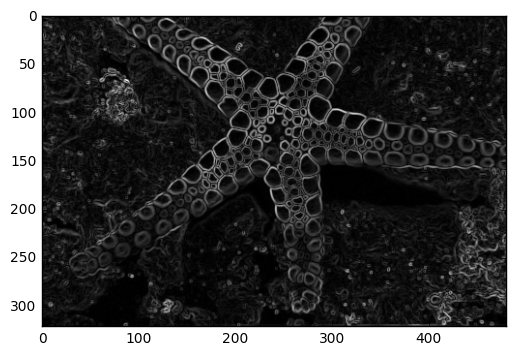

In [10]:
################################################################################
# TODO: Implement your own sobel edge detector                                 #
################################################################################
def my_sobel(img):
    # Input: 
    # img: an grayscale image 
    # Output:
    # edge: a map for the magnitude of gradient 
    # Hint: 
    # 1) The formula for sobel filter can be found here:https://en.wikipedia.org/wiki/Sobel_operator
    # 2) You can use scipy.ndimage.convolve for 2D convolution

    # Step 1: 
    # Design two filters sobel_kernel_h and sobel_kernel_v. 
    # They will be used to computer image gradient in horizontal and vertical directions

    
    # Step 2: 
    # convolve img with these two filters

    
    # Step 3: 
    # Compute edge: the map for the magnitude of gradient 

    return edge
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

edge = my_sobel(img_gray)

# display
plt.imshow(edge, cmap="gray");
plt.show()

# Task Two: L2 Image matching

In [1]:
# In this task we will do basic image matching using pixels

# Let's first load some image data
# This might take a little while (half a minute or so)
from notebooks.utils.data_utils import load_CIFAR10
cifar10_dir = 'data/datasets/cifar-10-batches-py'
print('Loading CIFAR10 ...')
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Loaded')
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Loading CIFAR10 ...


Loaded
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
# We do not want to wait. So let's keep only the first 1000 images 
# from the Training set for more efficient code execution in this exercise
import numpy as np
num_training = 1000
mask = range(num_training)
X_train = X_train[mask]

# Now, pick one random image from the Testing data
test_id = 333 # This is a testing frog image we selected for you
# test_id = 131 # This is a testing car image we selected for you

img_test = X_test[test_id]

# Before matching, let's vectorize X_train and img_test
X_train = np.reshape(X_train, (X_train.shape[0], -1))
img_test = np.reshape(img_test, (1, -1))
print('Training data shape: ', X_train.shape)
print('Test data shape: ', img_test.shape)

Training data shape:  (1000, 3072)
Test data shape:  (1, 3072)


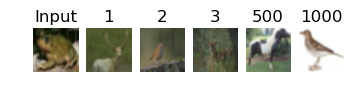

In [11]:
# Right, let's do some matching. The basic idea is 
# 1) Compute the L2 distance between each image in X_train to img_test.
# 2) Sort images in X_train by distance from low to high. 

################################################################################
# TODO: Implement Match_L2(test, train)                                        #
################################################################################
def Match_L2(test, train):
    # Input: 
    # test: an test image 
    # train: a array of training images
    # Output:
    # sort_list: a list of training images' indices, sorted by their L2 distances to test
    # Hint:
    L2dist = np.sum((train - test)**2, axis=1)
    sort_list = np.array([np.argsort(L2dist)])
    
    # 1) For sorting you can use np.argsort
    # 2) You can start with a for loop to compare each image in train. 
    # 3) The more efficient way is to do this without for loop. Checkout Numpy's broadcast feature
    
    # step 1: compute the L2 distance from train to test

    
    # step 2: sort images and save the result in sort_list
    
    return sort_list
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# call the Match_L2 function you just implemented to sort X_train
sort_list = Match_L2(img_test, X_train)

# Now, let's check our results 
# Let's display img_test and the [1, 2, 3, 500, 1000]th image in the sort_list
# Hint:
# 1) You can set img_test = X_train[test_id] in the previous code to check if the cloest match is the input image itself

def Vector2Image(v):
    return np.reshape(v, (32, 32, 3)).astype('uint8')
    
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(4, 2), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(Vector2Image(img_test))
ax1.set_title('Input')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(Vector2Image(X_train[sort_list[0, 0], :]))
ax2.set_title('1')
ax2.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(Vector2Image(X_train[sort_list[0, 1], :]))
ax3.set_title('2')
ax3.set_adjustable('box-forced')

ax4.axis('off')
ax4.imshow(Vector2Image(X_train[sort_list[0, 2], :]))
ax4.set_title('3')
ax4.set_adjustable('box-forced')

ax5.axis('off')
ax5.imshow(Vector2Image(X_train[sort_list[0, 499], :]))
ax5.set_title('500')
ax5.set_adjustable('box-forced')

ax6.axis('off')
ax6.imshow(Vector2Image(X_train[sort_list[0, 999], :]))
ax6.set_title('1000')
ax6.set_adjustable('box-forced')

plt.show()

# Task Three: Matching with Sobel Edge Map

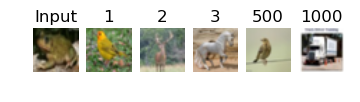

In [13]:
# The results shows that L2 distance between pixels performans poorly on this task
# Now, let's see what will happen if we match by sobel edge map

# Step 1: let's compute the edge map of the testing image
# It is necessary to convert img_test back to an image from its vector form, and convert color image to grayscale
sobel_test = my_sobel(rgb2gray(Vector2Image(img_test)))

################################################################################
# TODO: Use sobel edge for image matching                                     #
################################################################################
# Step 2: compute sobel_train, the edge maps for training images
sobel_train = np.array([my_sobel(rgb2gray(Vector2Image(img))) for img in X_train])

# Step 3: Vectorize sobel_test and sobel_train as we did before, so Match_L2 can be applied
sobel_train = np.reshape(sobel_train, (sobel_train.shape[0], -1))
sobel_test = np.reshape(sobel_test, (1, -1))

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Call the Match_L2 function you implemented to sort sobel_train
sort_list = Match_L2(sobel_test, sobel_train)

# Let's see the results
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(4, 2), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(Vector2Image(img_test))
ax1.set_title('Input')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(Vector2Image(X_train[sort_list[0, 0], :]))
ax2.set_title('1')
ax2.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(Vector2Image(X_train[sort_list[0, 1], :]))
ax3.set_title('2')
ax3.set_adjustable('box-forced')

ax4.axis('off')
ax4.imshow(Vector2Image(X_train[sort_list[0, 2], :]))
ax4.set_title('3')
ax4.set_adjustable('box-forced')

ax5.axis('off')
ax5.imshow(Vector2Image(X_train[sort_list[0, 499], :]))
ax5.set_title('500')
ax5.set_adjustable('box-forced')

ax6.axis('off')
ax6.imshow(Vector2Image(X_train[sort_list[0, 999], :]))
ax6.set_title('1000')
ax6.set_adjustable('box-forced')

plt.show()

# Task Four: Matching with HOG features

/usr/lib/python3/dist-packages/skimage/feature/_hog.py:129: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:, :, i] = temp_filt[subsample]


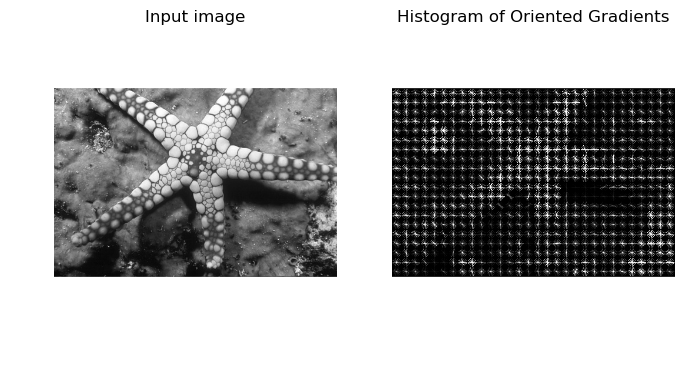

In [15]:
# As briefly mentioned in the class, HOG features is very similar to SIFT feature
# The main difference lies in engineering details and application scenarios
# See discussions here: https://www.quora.com/Computer-Vision-What-is-the-difference-between-HOG-and-SIFT-feature-descriptor

# Let's first have some fun with computing/visualizing HOG image
# Notice the input image has to be in grayscale 
# In this exercise we will use the built in HOG function from skimage.feature 
# reference http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog
img = mpimg.imread('data/test.jpg')
img_gray = rgb2gray(img)
fd, hog_image = hog(img_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img_gray, cmap="gray")
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap="gray")
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')

plt.show()

/usr/lib/python3/dist-packages/skimage/feature/_hog.py:129: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  orientation_histogram[:, :, i] = temp_filt[subsample]


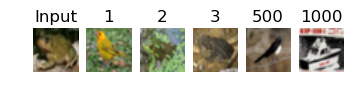

In [27]:
# Now you know how to compute HOG features, and what do they look like. 
# let's use them to match images!
################################################################################
# TODO: Use HOG feature for image matching                                     #
################################################################################
# Step 1: let's compute the HOG feature of the testing image
# Here are some parameters we selected for you. Feel free to experiment different settings.
orientations=8
pixels_per_cell=(4, 4)
cells_per_block=(1, 1)
visualise=True

fd_test, hog_test = hog(rgb2gray(Vector2Image(img_test)), orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualise=visualise)

# Step 2: compute hog_train - the HOG features for all training images
hog_train = np.array([hog(rgb2gray(Vector2Image(img)), orientations=orientations, pixels_per_cell=pixels_per_cell,
                    cells_per_block=cells_per_block, visualise=visualise)[1] for img in X_train])

hog_train = np.reshape(hog_train, (hog_train.shape[0], -1))
hog_test = np.reshape(hog_test, (1, -1))

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Match hog_test and hog_train
sort_list = Match_L2(hog_test, hog_train)

# Let's see the results
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(4, 2), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(Vector2Image(img_test))
ax1.set_title('Input')
ax1.set_adjustable('box-forced')

ax2.axis('off')
ax2.imshow(Vector2Image(X_train[sort_list[0, 0], :]))
ax2.set_title('1')
ax2.set_adjustable('box-forced')

ax3.axis('off')
ax3.imshow(Vector2Image(X_train[sort_list[0, 1], :]))
ax3.set_title('2')
ax3.set_adjustable('box-forced')

ax4.axis('off')
ax4.imshow(Vector2Image(X_train[sort_list[0, 2], :]))
ax4.set_title('3')
ax4.set_adjustable('box-forced')

ax5.axis('off')
ax5.imshow(Vector2Image(X_train[sort_list[0, 499], :]))
ax5.set_title('500')
ax5.set_adjustable('box-forced')

ax6.axis('off')
ax6.imshow(Vector2Image(X_train[sort_list[0, 999], :]))
ax6.set_title('1000')
ax6.set_adjustable('box-forced')

plt.show()

Hopefully you get some sensible matching results! 

Try different testing images and see how HOG well does descriptor work in general. 

In [25]:
img_test.shape

(1, 3072)